In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import the gasoline price data
df_gasoline_price = pd.read_csv('data/U.S._All_Grades_Conventional_Retail_Gasoline_Prices_Weekly.csv', skiprows = 4)

In [3]:
#Rename columns to Gas_Price_Date and Gas_price_per_gallon
df_gasoline_price.rename(columns={'Week of': 'Gas_Price_Date', 'Series ID: PET.EMM_EPM0U_PTE_NUS_DPG.W Dollars per Gallon': 'Gas_price_per_gallon'}, inplace=True)

In [4]:
# To match date values from other sources, subtract three days from Gas_Price_Date
df_gasoline_price['Gas_Price_Date'] = pd.DatetimeIndex(df_gasoline_price['Gas_Price_Date'])
df_gasoline_price['Date'] = df_gasoline_price['Gas_Price_Date'] -  pd.to_timedelta(3, unit='d')

In [5]:
#Change date format to MM/DD/YYYY format for Date and Gas_Price_Date
df_gasoline_price['Date'] = df_gasoline_price['Date'].dt.strftime('%m/%d/%Y')
df_gasoline_price['Gas_Price_Date'] = df_gasoline_price['Gas_Price_Date'].dt.strftime('%m/%d/%Y')

In [6]:
df_gasoline_price.head(5)

,Gas_Price_Date,Gas_price_per_gallon,Date
0,04/04/2022,4.096,04/01/2022
1,03/28/2022,4.152,03/25/2022
2,03/21/2022,4.165,03/18/2022
3,03/14/2022,4.252,03/11/2022
4,03/07/2022,4.031,03/04/2022


In [7]:
#Import the crude oil spot price data
df_crude_spot_price = pd.read_csv('data/Cushing_OK_WTI_Spot_Price_FOB_Weekly.csv', skiprows = 4)

In [8]:
#Rename columns to Date and Crude_price_per_barrel
df_crude_spot_price.rename(columns={'Week of': 'Date', 'Series ID: PET.RWTC.W Dollars per Barrel': 'Crude_price_per_barrel'}, inplace=True)

In [9]:
df_crude_spot_price.head()

,Date,Crude_price_per_barrel
0,03/25/2022,113.69
1,03/18/2022,100.43
2,03/11/2022,113.39
3,03/4/2022,106.80
4,02/25/2022,92.18


In [10]:
#Import the stock data
df_stock_gasoline = pd.read_csv('data/U.S._Ending_Stocks_of_Finished_Motor_Gasoline_Weekly.csv', skiprows = 4)

In [11]:
#Rename columns to Date and Stocks_per_thousand_barrels
df_stock_gasoline.rename(columns={'Week of': 'Date', 'Series ID: PET.WGFSTUS1.W Thousand Barrels': 'Stocks_per_thousand_barrels'}, inplace=True)

In [12]:
df_stock_gasoline.head()

,Date,Stocks_per_thousand_barrels
0,03/25/2022,18971
1,03/18/2022,18344
2,03/11/2022,17123
3,03/4/2022,19062
4,02/25/2022,17714


In [13]:
#Import the gasoline supply data
df_gasoline_supply = pd.read_csv('data/U.S._Days_of_Supply_of_Total_Gasoline_Weekly.csv', skiprows = 4)

In [14]:
#Rename columns to Date and No_of_days
df_gasoline_supply.rename(columns={'Week of': 'Date', 'Series ID: PET.W_EPM0_VSD_NUS_DAYS.W Number of Days': 'No_of_days'}, inplace=True)

In [15]:
df_gasoline_supply.head()

,Date,No_of_days
0,03/25/2022,27.3
1,03/18/2022,27.0
2,03/11/2022,27.3
3,03/4/2022,28.0
4,02/25/2022,28.0


In [16]:
#Import the refinery capacity data
df_refinery_capacity = pd.read_csv('data/U.S._Percent_Utilization_of_Refinery_Operable_Capacity_Weekly.csv', skiprows = 4)

In [17]:
#Rename columns to Date and Utilization_percentage
df_refinery_capacity.rename(columns={'Week of': 'Date', 'Series ID: PET.WPULEUS3.W Percent': 'Utilization_percentage'}, inplace=True)

In [18]:
df_refinery_capacity.head()

,Date,Utilization_percentage
0,03/25/2022,92.1
1,03/18/2022,91.1
2,03/11/2022,90.4
3,03/4/2022,89.3
4,02/25/2022,87.7


In [19]:
#Import the crude oil export data
df_crude_exports = pd.read_csv('data/U.S._Exports_of_Crude_Oil_Weekly.csv', skiprows = 4)

In [20]:
#Rename columns to Date and Exp_thousand_barrels_per_day
df_crude_exports.rename(columns={'Week of': 'Date', 'Series ID: PET.WCREXUS2.W Thousand Barrels per Day': 'Exp_thousand_barrels_per_day'}, inplace=True)

In [21]:
df_crude_exports.head()

,Date,Exp_thousand_barrels_per_day
0,03/25/2022,2988
1,03/18/2022,3844
2,03/11/2022,2936
3,03/4/2022,2422
4,02/25/2022,3796


In [22]:
#Import the crude oil import data
df_crude_imports = pd.read_csv('data/U.S._Imports_of_Crude_Oil_Weekly.csv', skiprows = 4)

In [23]:
#Rename columns to Date and Imp_thousand_barrels_per_day
df_crude_imports.rename(columns={'Week of': 'Date', 'Series ID: PET.WCRIMUS2.W Thousand Barrels per Day': 'Imp_thousand_barrels_per_day'}, inplace=True)

In [24]:
df_crude_imports.head()

,Date,Imp_thousand_barrels_per_day
0,03/25/2022,6259
1,03/18/2022,6486
2,03/11/2022,6395
3,03/4/2022,6319
4,02/25/2022,5767


In [25]:
# Merge all the dataframes based on Date 
df_temp_1 = pd.merge(df_crude_spot_price, df_stock_gasoline, on = ['Date'], how = 'inner')
df_temp_2 = pd.merge(df_temp_1, df_gasoline_supply, on = ['Date'], how = 'inner')
df_temp_3 = pd.merge(df_temp_2, df_refinery_capacity, on = ['Date'], how = 'inner')
df_temp_4 = pd.merge(df_temp_3, df_crude_exports, on = ['Date'], how = 'inner')
df_temp_5 = pd.merge(df_temp_4, df_crude_imports, on = ['Date'], how = 'inner')
df_merged = pd.merge(df_temp_5, df_gasoline_price, on = ['Date'], how = 'inner')
df_merged.head()

,Date,Crude_price_per_barrel,Stocks_per_thousand_barrels,No_of_days,Utilization_percentage,Exp_thousand_barrels_per_day,Imp_thousand_barrels_per_day,Gas_Price_Date,Gas_price_per_gallon
0,03/25/2022,113.69,18971,27.3,92.1,2988,6259,03/28/2022,4.152
1,03/18/2022,100.43,18344,27.0,91.1,3844,6486,03/21/2022,4.165
2,03/11/2022,113.39,17123,27.3,90.4,2936,6395,03/14/2022,4.252
3,02/25/2022,92.18,17714,28.0,87.7,3796,5767,02/28/2022,3.554
4,02/18/2022,92.89,17624,28.5,87.4,2686,6828,02/21/2022,3.480


In [26]:
df_merged.to_csv("data/Gas_Price_Data_Merged.csv", index = False)

In [36]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 1005
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1006 non-null   object 
 1   Crude_price_per_barrel        1006 non-null   float64
 2   Stocks_per_thousand_barrels   1006 non-null   int64  
 3   No_of_days                    1006 non-null   float64
 4   Utilization_percentage        1006 non-null   float64
 5   Exp_thousand_barrels_per_day  1006 non-null   int64  
 6   Imp_thousand_barrels_per_day  1006 non-null   int64  
 7   Gas_Price_Date                1006 non-null   object 
 8   Gas_price_per_gallon          1006 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 78.6+ KB


In [37]:
# Now, reread the file
gas_price_df = pd.read_csv('data/Gas_Price_Data_Merged.csv', 
                       parse_dates=['Date', 'Gas_Price_Date'])

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [61]:
X = gas_price_df.iloc[:, 1:7]
X.shape

(1006, 6)

In [62]:
X.head(5)

,Crude_price_per_barrel,Stocks_per_thousand_barrels,No_of_days,Utilization_percentage,Exp_thousand_barrels_per_day,Imp_thousand_barrels_per_day
0,113.69,18971,27.3,92.1,2988,6259
1,100.43,18344,27.0,91.1,3844,6486
2,113.39,17123,27.3,90.4,2936,6395
3,92.18,17714,28.0,87.7,3796,5767
4,92.89,17624,28.5,87.4,2686,6828


In [63]:
y = gas_price_df['Gas_price_per_gallon']
y.shape

(1006,)

In [64]:
y.head(5)

0    4.152
1    4.165
2    4.252
3    3.554
4    3.480
Name: Gas_price_per_gallon, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=1)

print('Xtrain.shape is {}'.format(Xtrain.shape))
print('Xtest.shape is {}'.format(Xtest.shape))
print('ytrain.shape is {}'.format(ytrain.shape))
print('ytest.shape is {}'.format(ytest.shape))

Xtrain.shape is (754, 6)
Xtest.shape is (252, 6)
ytrain.shape is (754,)
ytest.shape is (252,)


In [66]:
model.fit(Xtrain, ytrain)                 
y_model = model.predict(Xtest)            

In [67]:
model.score(Xtrain,ytrain)
model.score(Xtest,ytest)

0.9714247051582191

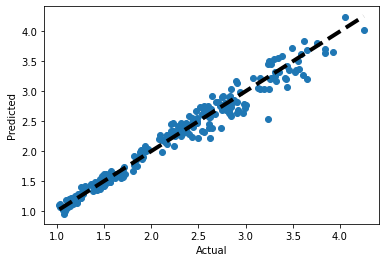

In [68]:
fig, ax = plt.subplots()
ax.scatter(ytest, y_model)
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [70]:
#DNN Model 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

dnnModel = tf.keras.Sequential()

dnnModel.add(tf.keras.layers.Dense(128, input_shape=(6, ), activation='relu', name='dense_1', kernel_initializer='GlorotNormal'))
dnnModel.add(tf.keras.layers.Dense(64, activation='relu', name='dense_2'))
dnnModel.add(tf.keras.layers.Dense(1, activation='linear', name='dense_output'))

dnnModel.compile(loss='mean_squared_error', metrics=['mae'], optimizer=tf.keras.optimizers.Adam(0.1))
dnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               896       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________
